In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## Read in data and remove unnecessary columns

In [2]:
# Import data
path = "resources/vgsales.csv"
vg_sales_df = pd.read_csv(path)
vg_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Drop columns
vg_sales_df.drop(["Name", "Year", "Publisher"], axis=1, inplace=True)
vg_sales_df.set_index("Rank", inplace=True)
vg_sales_df.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,
1,Wii,Sports,41.49,29.02,3.77,8.46,82.74
2,NES,Platform,29.08,3.58,6.81,0.77,40.24
3,Wii,Racing,15.85,12.88,3.79,3.31,35.82
4,Wii,Sports,15.75,11.01,3.28,2.96,33.00
5,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [4]:
# Get unique Platform values
vg_sales_df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [5]:
# Make sure there are no null values
vg_sales_df["Platform"].isnull().sum()

0

In [6]:
# Get unique Genre values
vg_sales_df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [7]:
# Make sure there are no null values
vg_sales_df["Genre"].isnull().sum()

0

In [8]:
# Make sure sales columns do not have null values
print(f"NA_Sales has {vg_sales_df['NA_Sales'].isnull().sum()} null values.")
print(f"EU_Sales has {vg_sales_df['EU_Sales'].isnull().sum()} null values.")
print(f"JP_Sales has {vg_sales_df['JP_Sales'].isnull().sum()} null values.")
print(f"Other_Sales has {vg_sales_df['Other_Sales'].isnull().sum()} null values.")
print(f"Global_Sales has {vg_sales_df['Global_Sales'].isnull().sum()} null values.")

NA_Sales has 0 null values.
EU_Sales has 0 null values.
JP_Sales has 0 null values.
Other_Sales has 0 null values.
Global_Sales has 0 null values.


In [9]:
# Write reduced df to csv
vg_sales_df.to_csv('resources/vgsales_reduced_with_global_sales_nrm_sales.csv')

## Normalize Sales Data

In [9]:
# Create dataframe with only sales data
sales_data_orig = vg_sales_df.filter(["NA_Sales","EU_Sales","JP_Sales","Other_Sales"], axis=1)
sales_data_orig.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,
1,41.49,29.02,3.77,8.46
2,29.08,3.58,6.81,0.77
3,15.85,12.88,3.79,3.31
4,15.75,11.01,3.28,2.96
5,11.27,8.89,10.22,1.00


In [10]:
# Create a copy of the sales data df to normalize
sales_data_nrm = sales_data_orig.copy()

In [11]:
global_max = vg_sales_df["Global_Sales"].max()
global_max

82.74

In [12]:
# Find max values for sales data
global_max = vg_sales_df["Global_Sales"].max()

# Reassign NA_sales value
for index,row in sales_data_nrm.iterrows():
    
    # NA Sales        
    sales_data_nrm.loc[index,"NA_Sales"] = sales_data_nrm.loc[index,"NA_Sales"]/global_max
    # EU Sales
    sales_data_nrm.loc[index,"EU_Sales"] = sales_data_nrm.loc[index,"EU_Sales"]/global_max
    # JP Sales
    sales_data_nrm.loc[index,"JP_Sales"] = sales_data_nrm.loc[index,"JP_Sales"]/global_max
    # Other Sales
    sales_data_nrm.loc[index,"Other_Sales"] = sales_data_nrm.loc[index,"Other_Sales"]/global_max


sales_data_nrm.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,
1,0.501450,0.350737,0.045564,0.102248
2,0.351462,0.043268,0.082306,0.009306
3,0.191564,0.155668,0.045806,0.040005
4,0.190355,0.133067,0.039642,0.035775
5,0.136210,0.107445,0.123519,0.012086


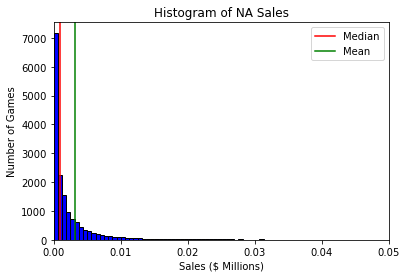

The median normalized sales for NA is $0.001 Million


In [13]:
# Create Histogram to view NA Sales distribution
plt.hist(sales_data_nrm['NA_Sales'], color = 'blue', edgecolor = 'black',
         bins = 800)
plt.title('Histogram of NA Sales')
plt.xlabel('Sales ($ Millions)')
plt.ylabel('Number of Games')
plt.xlim(left=0, right=0.05)
plt.axvline(sales_data_nrm['NA_Sales'].median(),label="Median",color='red')
plt.axvline(sales_data_nrm['NA_Sales'].mean(),label="Mean",color='green')
plt.legend()
plt.show()

print(f"The median normalized sales for NA is ${round(sales_data_nrm['NA_Sales'].median(),3)} Million")

## Categorize NA_Sales Column

In [14]:
# Copy vg_sales_df
categorize_na_sales = sales_data_nrm.filter(["NA_Sales"], axis=1)
categorize_na_sales

,NA_Sales
Rank,
1,0.501450
2,0.351462
3,0.191564
4,0.190355
5,0.136210
...,...
16596,0.000121
16597,0.000121
16598,0.000000


In [15]:
# Set threshold sales number
na_sales_threshold = round(sales_data_nrm['NA_Sales'].median(),3)

# Reassign NA_sales value
for index,row in categorize_na_sales.iterrows():
    
    # NA Sales
    if row.NA_Sales > na_sales_threshold:
        categorize_na_sales.loc[index] = 1
    else:
        categorize_na_sales.loc[index] = 0

na_sales_col_name = "NA_Sales_gt_" + str(na_sales_threshold)
categorize_na_sales.\
    rename(columns={"NA_Sales": na_sales_col_name}, inplace=True)

categorize_na_sales.head()

,NA_Sales_gt_0.001
Rank,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


In [16]:
# Write categorized df to csv file
output_file_str = "NA_Sales_nrm_thresh_" + \
    str(na_sales_threshold).split(".")[0] + "p" + str(na_sales_threshold).split(".")[1] + "_nrm_sales.csv"
categorize_na_sales.to_csv('resources/' + output_file_str)

## Separate Sales Data for EU, JP, and Other

In [17]:
sales_data = sales_data_nrm.filter(["EU_Sales","JP_Sales","Other_Sales"], axis=1)
sales_data.head()

,EU_Sales,JP_Sales,Other_Sales
Rank,,,
1,0.350737,0.045564,0.102248
2,0.043268,0.082306,0.009306
3,0.155668,0.045806,0.040005
4,0.133067,0.039642,0.035775
5,0.107445,0.123519,0.012086


In [18]:
# Create platform df
platform_df = vg_sales_df.filter(["Platform"], axis=1)
platform_df.head()

,Platform
Rank,
1,Wii
2,NES
3,Wii
4,Wii
5,GB


## Encode Platform data

In [19]:
# Encode platform df
platform_encoded_df = pd.get_dummies(platform_df)
platform_encoded_df.head()

,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
Rank,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Get shape of platform_encoded_df
platform_encoded_df.shape

(16598, 31)

In [25]:
# Write encoded platform data to CSV
platform_encoded_df.to_csv('resources/encoded_platform_nrm_sales.csv')

## Encode Genre data

In [20]:
# Create genre df
genre_df = vg_sales_df.filter(["Genre"], axis=1)
genre_df.head()

,Genre
Rank,
1,Sports
2,Platform
3,Racing
4,Sports
5,Role-Playing


In [21]:
# Encode genre df
genre_encoded_df = pd.get_dummies(genre_df)
genre_encoded_df.head()

,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Rank,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
# Get shape of genre_encoded_df
genre_encoded_df.shape

(16598, 12)

In [29]:
# Write encoded genre data to CSV
genre_encoded_df.to_csv('resources/encoded_genre_nrm_sales.csv')

## Combine dataframes for analysis

In [23]:
# Combine dataframes to create sales_df_encoded
sales_df_encoded = categorize_na_sales.join(sales_data, how='outer').\
    join(platform_encoded_df, how='outer').join(genre_encoded_df, how='outer')
sales_df_encoded.head()

,NA_Sales_gt_0.001,EU_Sales,JP_Sales,Other_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Rank,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.350737,0.045564,0.102248,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,0.043268,0.082306,0.009306,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,0.155668,0.045806,0.040005,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,0.133067,0.039642,0.035775,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1.0,0.107445,0.123519,0.012086,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [24]:
# Create smaller df of 100 rows selected randomly from larger dataset
sales_reduced = sales_df_encoded.sample(n=500)
sales_reduced.head()

,NA_Sales_gt_0.001,EU_Sales,JP_Sales,Other_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Rank,,,,,,,,,,,,,,,,,,,,,
5855,1.0,0.001450,0.0,0.000483,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8106,1.0,0.000483,0.0,0.000242,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4248,1.0,0.001450,0.0,0.000121,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7711,1.0,0.000604,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13495,0.0,0.000121,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# Drop the index
sales_reduced_no_idx = sales_reduced.reset_index(drop=True)
sales_reduced_no_idx.head()

,NA_Sales_gt_0.001,EU_Sales,JP_Sales,Other_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1.0,0.001450,0.0,0.000483,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.000483,0.0,0.000242,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,0.001450,0.0,0.000121,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,0.000604,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.000121,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Perform ML with Logistic Regression

In [26]:
# Count True/False NA_Sales numbers
sales_reduced_no_idx[na_sales_col_name].value_counts()

0.0    258
1.0    242
Name: NA_Sales_gt_0.001, dtype: int64

In [27]:
# Set X and y data
y = sales_reduced_no_idx[na_sales_col_name]
X = sales_reduced_no_idx.drop(columns=na_sales_col_name)

In [28]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(375, 46)

In [29]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [30]:
# Train the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [31]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,0.0
9,1.0,0.0


In [32]:
# Assess accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.544


In [33]:
# # Print confusion matrix
# from sklearn.metrics import confusion_matrix, classification_report
# matrix = confusion_matrix(y_test, y_pred)
# print(matrix)

# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# # Create a DataFrame from the confusion matrix.
# cm_df = pd.DataFrame(
#     cm, index=["Actual high_risk", "Actual low_risk"], columns=["Predicted high_risk", "Predicted low_risk"])

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual NA Sales < 0.1", "Actual NA Sales > 0.1"], columns=["Predicted NA Sales < 0.1", "Predicted NA Sales > 0.1"])


cm_df

,Predicted NA Sales < 0.1,Predicted NA Sales > 0.1
Actual NA Sales < 0.1,39,25
Actual NA Sales > 0.1,32,29


In [34]:
# Print classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.55      0.61      0.58        64
         1.0       0.54      0.48      0.50        61

    accuracy                           0.54       125
   macro avg       0.54      0.54      0.54       125
weighted avg       0.54      0.54      0.54       125

